<a href="https://colab.research.google.com/github/thanhphap059/NguyenThanhPhap19146230/blob/main/10_MON_AN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Link Github: https://github.com/thanhphap059/NguyenThanhPhap19146230.git

# Nguyễn Thanh Pháp MSSV 19146230
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Chuyển đến thư mục ảnh có chứa món ăn
%cd /content/drive/MyDrive/Colab Notebooks/BTW14/MON_AN

/content/drive/MyDrive/Colab Notebooks/BTW14/MON_AN


In [3]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTW14/MON_AN/training',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 877 images belonging to 10 classes.


In [5]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTW14/MON_AN/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 200 images belonging to 10 classes.


In [6]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Bún thịt nướng': 0,
 'bánh bèo': 1,
 'bánh hỏi': 2,
 'bánh ít lá gai': 3,
 'bánh mì': 4,
 'bún bò huế': 5,
 'cháo lòng': 6,
 'cơm tấm': 7,
 'gà nướng muối ớt': 8,
 'ốc móng tay xào rau muống': 9}

In [7]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Bún thịt nướng': 0,
 'bánh bèo': 1,
 'bánh hỏi': 2,
 'bánh ít lá gai': 3,
 'bánh mì': 4,
 'bún bò huế': 5,
 'cháo lòng': 6,
 'cơm tấm': 7,
 'gà nướng muối ớt': 8,
 'ốc móng tay xào rau muống': 9}

In [8]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/500
28/28 [==============================] - 341s 12s/step - loss: 3.6264 - accuracy: 0.1345 - val_loss: 2.1102 - val_accuracy: 0.2050
Epoch 2/500
28/28 [==============================] - 127s 5s/step - loss: 2.0546 - accuracy: 0.2338 - val_loss: 1.9582 - val_accuracy: 0.2850
Epoch 3/500
28/28 [==============================] - 127s 5s/step - loss: 1.8940 - accuracy: 0.2908 - val_loss: 1.7443 - val_accuracy: 0.3850
Epoch 4/500
28/28 [==============================] - 127s 5s/step - loss: 1.8293 - accuracy: 0.3216 - val_loss: 1.6862 - val_accuracy: 0.4050
Epoch 5/500
28/28 [==============================] - 127s 5s/step - loss: 1.6308 - accuracy: 0.3945 - val_loss: 1.4628 - val_accuracy: 0.4700
Epoch 6/500
28/28 [==============================] - 127s 5s/step - loss: 1.5122 - accuracy: 0.4436 - val_loss: 1.3685 - val_accuracy: 0.4500
Epoch 7/500
28/28 [==============================] - 127s 5s/step - loss: 1.4579 - accuracy: 0.4675 - val_loss: 1.2488 - val_accuracy: 0.5050
Epoch

In [10]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.025192013010382652
Train Accuracy 0.9885975122451782


<function matplotlib.pyplot.show>

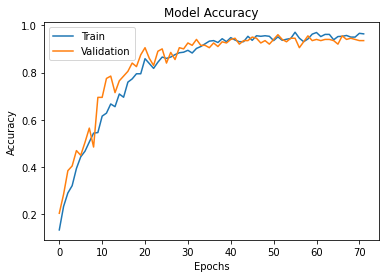

In [11]:
 # Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [15]:
# Lưu lại
model.save("Food.h5")

In [16]:
# Tải mô hình 
model_CNN=load_model('Food.h5')

bánh bèo


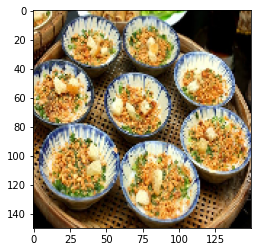

bún bò huế


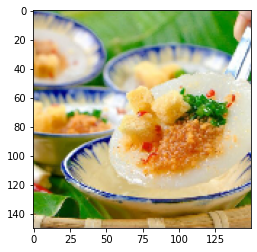

bánh bèo


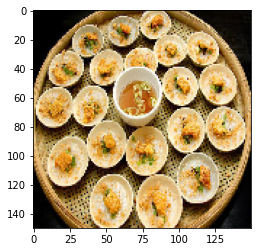

bánh bèo


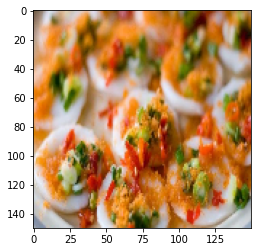

bánh bèo


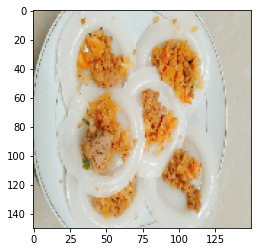

bánh hỏi


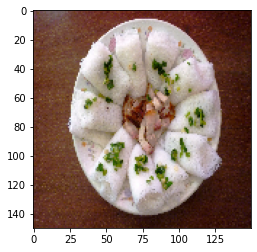

bánh hỏi


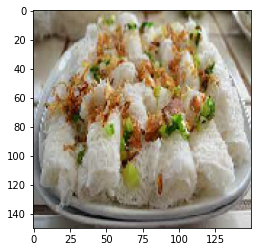

bánh hỏi


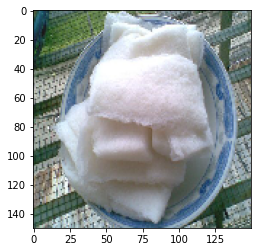

bánh hỏi


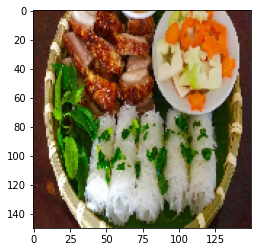

bánh hỏi


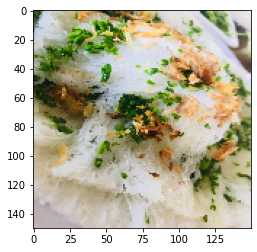

bánh ít lá gai


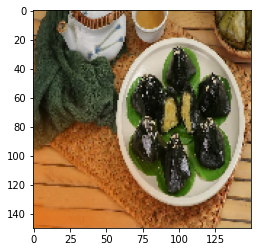

bánh ít lá gai


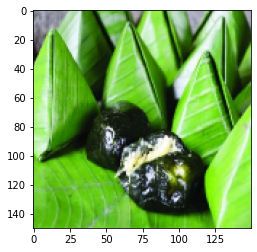

bánh ít lá gai


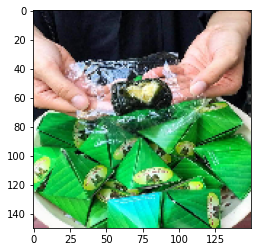

gà nướng muối ớt


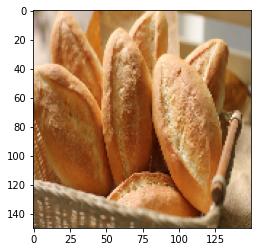

bánh mì


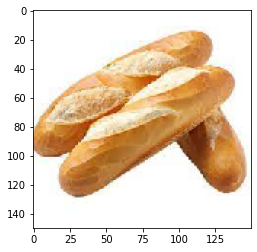

bánh mì


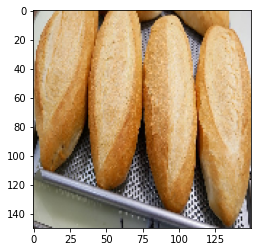

bánh mì


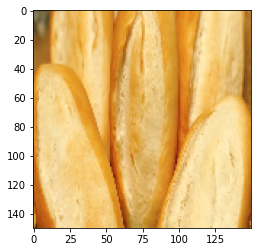

Bún thịt nướng


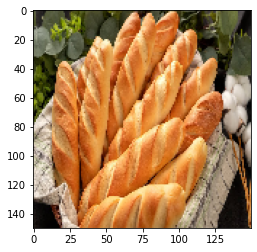

bún bò huế


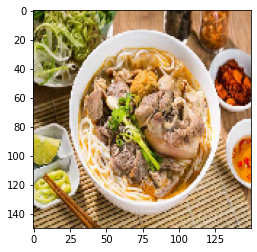

bún bò huế


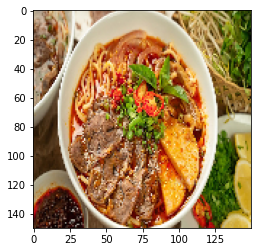

bún bò huế


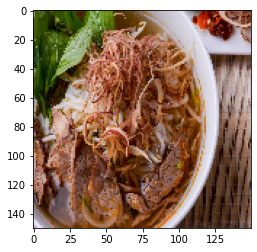

bún bò huế


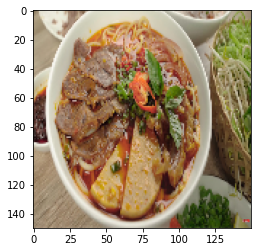

bún bò huế


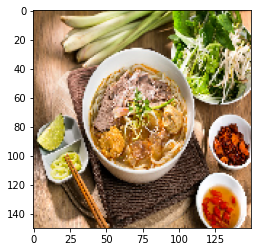

bún bò huế


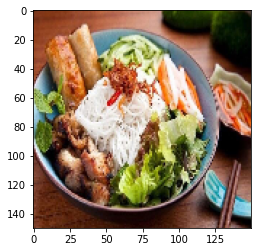

cơm tấm


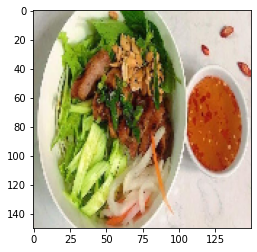

Bún thịt nướng


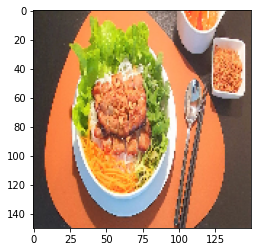

Bún thịt nướng


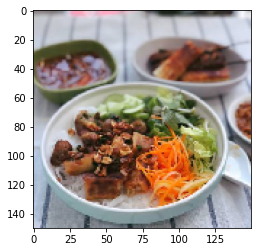

Bún thịt nướng


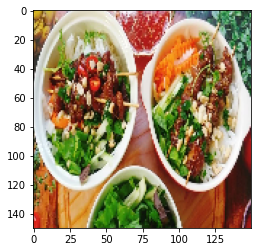

cháo lòng


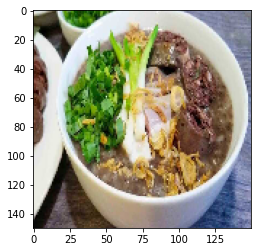

cháo lòng


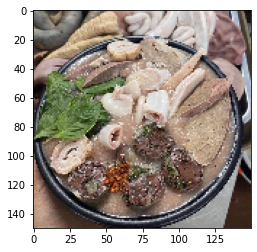

cháo lòng


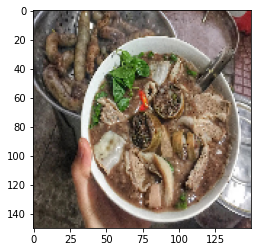

cháo lòng


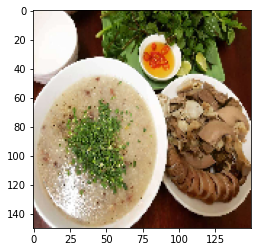

cháo lòng


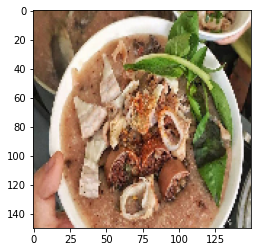

In [17]:
test="/content/drive/MyDrive/Colab Notebooks/BTW14/MON_AN/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Bún thịt nướng'
  if round(result[0][1])==1:
    prediction='bánh bèo'
  if round(result[0][2])==1:
    prediction='bánh hỏi'
  if round(result[0][3])==1:
    prediction='bánh ít lá gai'
  if round(result[0][4])==1:
    prediction='bánh mì'
  if round(result[0][5])==1:
    prediction='bún bò huế'
  if round(result[0][6])==1:
    prediction='cháo lòng'
  if round(result[0][7])==1:
    prediction='cơm tấm'
  if round(result[0][8])==1:
    prediction='gà nướng muối ớt'
  if round(result[0][9])==1:
    prediction='ốc móng tay xào rau muống'
  print(prediction)
  plt.show()
